# Assignment 1:Edmunds Text Analysis

#**Authors**:

##Matthew Leong - 8:30 section 
##Chirag Ramesh - 8:30 section
##David Cruz - 10:30 Section 
##Grayson Taylor - 8:30 section
##Sidd Chauhan  - 8:30 section

# Web Scraping

In [ ]:
# Use this code if using Colab to run Selenium

# Make sure to go to Runtime -> Change runtime type and select Python 3 as runtime type and GPU as hardware accelerator

# !kill -9 -1 # Use this line to delete this VM and start a new one. 
# The above line deletes all files and folders from the current VM and allocates a new one.

!pip install selenium
!apt-get -q update # to update ubuntu to correctly run apt install
!apt install -yq chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

     |████████████████████████████████| 911kB 2.0MB/s 
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [1,094 kB]
Get:12 http://sec

In [ ]:
#Importing packages for later
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import manifold
from matplotlib.font_manager import FontProperties
import re
driver = webdriver.Chrome('chromedriver', options=chrome_options)


In [ ]:
#Creating the url list
url_list = []

#create the base url
url = 'https://forums.edmunds.com/discussion/8/general/x/car-commercials-the-good-the-bad-and-the-annoying'

#Append it to the list
url_list.append(url)

#Aim to get all of the urls
#168 is the end value cause Python counts weird.
#We start at 2 in the range cause the first page is just the base url
for i in range(2, 168):
  #make the page url to append.
  #This works by concatenating strings.
  #str(i) converts the i which is an integer into a string for concatenation
  url2 = url + '/p' + str(i)
  #Append this url to the url_list
  url_list.append(url2)

In [ ]:
#Function to do so.
#Running the double for loop in multiple increments to avoid overloading chrome driver.
def append_to_comments(df, url_list):
  comments = df
  for url_i in url_list:
    #Uses selenium webdriver to create a driver object.
    driver = webdriver.Chrome('chromedriver', options=chrome_options)

    #Use object methods to get the url. 
    driver.get(url_i)

    #Get the ids for the for loop.
    ids = driver.find_elements_by_xpath("//*[contains(@id,'Comment_')]")

    comment_ids = []
    for i in ids:
      comment_ids.append(i.get_attribute('id'))

    for x in comment_ids:
      #Extract dates from for each user on a page
      user_date = driver.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[2]/span[1]/a/time')[0]
      date = user_date.get_attribute('title')

      #Extract user ids from each user on a page
      userid_element = driver.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[1]/span[1]/a[2]')[0]
      userid = userid_element.text

      #Extract Message for each user on a page
      user_message = driver.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[3]/div/div[1]')[0]
      comment = user_message.text
                                    
      #Adding date, userid and comment for each user in a dataframe    
      comments.loc[len(comments)] = [date,userid,comment]
  return comments

In [ ]:
#Function to do so.
#Running the double for loop in multiple increments to avoid overloading chrome driver.
def append_to_comments(df, url_list):
  comments = df
  for url_i in url_list:
    #Uses selenium webdriver to create a driver object.
    driver = webdriver.Chrome('chromedriver', options=chrome_options)

    #Use object methods to get the url. 
    driver.get(url_i)

    #Get the ids for the for loop.
    ids = driver.find_elements_by_xpath("//*[contains(@id,'Comment_')]")

    comment_ids = []
    for i in ids:
      comment_ids.append(i.get_attribute('id'))

    for x in comment_ids:
      #Extract dates from for each user on a page
      user_date = driver.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[2]/span[1]/a/time')[0]
      date = user_date.get_attribute('title')

      #Extract user ids from each user on a page
      userid_element = driver.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[1]/span[1]/a[2]')[0]
      userid = userid_element.text

      #Extract Message for each user on a page
      user_message = driver.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[3]/div/div[1]')[0]
      comment = user_message.text
                                    
      #Adding date, userid and comment for each user in a dataframe    
      comments.loc[len(comments)] = [date,userid,comment]
  return comments

In [ ]:
#Create an empty data frame
comments = pd.DataFrame(columns = ['Date','user_id','comments']) 

In [ ]:
#Can't run the entire list because that certain pages make selenium time out.
#We decided to do the most recent comments. So we start on page 67.
url_list1 = url_list[67:135]
#Page 135 is excluded due to timing out issues
#Get pages 136-167
url_list2 = url_list[135:168]

#url_list3 = url_list[50:75]
#url_list4 = url_list[75:100]

In [ ]:
#Get pages 67-134 onto the comment dataframe.
comments = append_to_comments(comments,url_list1)

In [ ]:
#Skip page 135
#Get pages 136-167 into the comment dataframe
comments = append_to_comments(comments,url_list2)

In [ ]:
#Result from scraping pages 1-26. Error on page 27.
len(comments)

In [ ]:
#Optional line to rename the user_id to username: comments = comments.rename(columns = {'user_id': 'username'})
#rename the index to ID. Yes this is necessary for later.
comments.index.name = "ID"
comments.head()

In [ ]:
#Write scraping results to a csv
comments.to_csv("scrape_results.csv", sep="\t")
!ls

# Text Analysis


In [ ]:
import pandas as pd
df = pd.read_csv('scrape_results.csv',sep='\t')
#See if can read the file back. It does work
#There is an extra ID column
#Line to remove extra column
df = df.drop(columns = 'ID')
#Display the head.
df.head()

,Date,user_id,comments
0,"June 29, 2000 9:33PM",bdreggors,One of my current favorites is the Lexus IS co...
1,"June 30, 2000 2:14AM",markz2k,What's the deal with the Dog family in the Ody...
2,"June 30, 2000 1:57PM",roadroach,The whole point of commercials is to get your ...
3,"June 30, 2000 3:04PM",markz2k,"Yeah, I agree the point is to get your attenti..."
4,"June 30, 2000 3:25PM",bdreggors,I've noticed two fallicies in Hodna commercial...


In [ ]:
car_df = pd.read_csv('car models and brands.csv', names = ['car_brand','car_model'])
car_df.head()


,car_brand,car_model
0,acura,integra
1,acura,legend
2,acura,vigor
3,acura,rlx
4,acura,ilx


In [ ]:
import numpy as np
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.probability import FreqDist

from nltk import pos_tag, word_tokenize
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt

from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
## Read in the scraped data
posts = pd.read_csv("scrape_results.csv", sep='\t')
#posts = posts.drop(columns= ["Unnamed: 0"])

## Read in the model-brand mapping data
model_brand = pd.read_csv("car models and brands.csv", header = None)
model_brand.columns = ['brand','model']
model_brand.head()

,brand,model
0,acura,integra
1,acura,legend
2,acura,vigor
3,acura,rlx
4,acura,ilx


In [ ]:
## Create dictionary for model to brand mapping
model_brand = model_brand.set_index('model')
model_brand_dict = model_brand["brand"].to_dict()


In [ ]:
stop = stopwords.words('english')

posts["comments"] = posts["comments"].astype(str)
posts["comments_tokens"] = posts["comments"].apply(lambda each_post: word_tokenize(re.sub(r'[^\w\s]',' ',each_post.lower())))
posts["comments_tokens"] = posts["comments_tokens"].apply(lambda list_of_words: [x if x not in model_brand_dict else model_brand_dict[x] for x in list_of_words])
posts["comments_tokens"] = posts["comments_tokens"].apply(lambda list_of_words: [x for x in list_of_words if x not in stop])


In [ ]:
## Get all the unique tokens in each comments
posts["comments_unique"] = posts["comments_tokens"].apply(lambda x: sorted(set(x)))

##Lift Analysis of Brands
Identified top 10 brands by frequency. From the posts, we calculated lift ratios for associations between the brands. Showed the brands on a multi-dimensional scaling (MDS) map for visualization.

In [ ]:
## Get frequency of all words
all_words = posts['comments_unique'].sum()
freq_dist = nltk.FreqDist(all_words)

In [ ]:
## Get the frequency counts of all brands
all_brands_dict = {your_key: freq_dist[your_key] for your_key in freq_dist.keys() if your_key in model_brand_dict.values()}
all_brands = pd.DataFrame.from_dict(all_brands_dict, orient='index').reset_index()
all_brands.columns = ["brand","word_frequency"]
all_brands.sort_values("word_frequency", ascending= False, inplace=True)

In [ ]:
## Removing some noise from the data
all_brands = all_brands[~all_brands.brand.isin(['car','problem','sedan','seat'])]

##Top 10 brands

In [ ]:
## Display the top 10 brands by frequency count, but eliminating non-brands
top_brands = all_brands.head(10)
top10 = all_brands.head(10)
top_brands

,brand,word_frequency
0,toyota,571
5,ford,310
3,chevrolet,308
1,honda,290
14,hyundai,267
12,subaru,242
4,bmw,225
21,audi,167
7,nissan,152
6,volkswagen,146


In [ ]:
posts.head()

,ID,Date,user_id,comments,comments_tokens,comments_unique
0,0,"June 29, 2000 9:33PM",bdreggors,One of my current favorites is the Lexus IS co...,"[one, current, favorites, lexus, commercial, g...","[blackmails, boss, cheesy, commercial, current..."
1,1,"June 30, 2000 2:14AM",markz2k,What's the deal with the Dog family in the Ody...,"[deal, dog, family, odysey, commercials, never...","[00, ago, always, annoying, anybody, anyway, a..."
2,2,"June 30, 2000 1:57PM",roadroach,The whole point of commercials is to get your ...,"[whole, point, commercials, get, attention, re...","[1, 2, also, attention, came, commercial, comm..."
3,3,"June 30, 2000 3:04PM",markz2k,"Yeah, I agree the point is to get your attenti...","[yeah, agree, point, get, attention, easily, b...","[agree, attention, away, backfire, bell, best,..."
4,4,"June 30, 2000 3:25PM",bdreggors,I've noticed two fallicies in Hodna commercial...,"[noticed, two, fallicies, hodna, commercials, ...","[1, 2, analog, analyze, clack, clikity, close,..."


### Lift function

In [ ]:
def calculate_lift(a, b, tokenized_posts):
    num_a = 0
    num_b = 0
    num_a_b = 0
    n = len(tokenized_posts)
    if a==b:
        return 1
    for i in tokenized_posts:
        if a in i:
            num_a += 1
        if b in i:
            num_b += 1
        if a in i and b in i:
            num_a_b += 1
    if num_a == 0:
        return (float(n)*num_a_b)/(num_b)
    elif num_b == 0:
        return (float(n)*num_a_b)/(num_a)
    else:
        return (float(n)*num_a_b)/(num_a*num_b)

In [ ]:
## Get the lift scores for the top-10 brands
num_brands = 10

## print(top_brands)
top_brands = top_brands.head(num_brands)
lift_brands = []
for index, brand_a in top_brands.iterrows():
    for index, brand_b in top_brands.iterrows():
        lift_brands.append(calculate_lift(brand_a.brand, brand_b.brand, posts.comments_unique))

In [ ]:
lift_brands_df = np.reshape(lift_brands,(num_brands,num_brands))
lift_brands_df

array([[1.        , 1.45826789, 1.18548002, 2.48814542, 1.20472002,
        1.83210548, 1.04322242, 1.19731116, 2.23057425, 1.19089317],
       [1.45826789, 1.        , 2.9634269 , 2.65041157, 0.83962788,
        2.11740869, 1.2098638 , 0.76708518, 1.36952462, 1.31612903],
       [1.18548002, 2.9634269 , 1.        , 2.05629198, 0.78471716,
        1.33197381, 1.7191342 , 1.93016564, 1.90857826, 1.76623377],
       [2.48814542, 2.65041157, 2.05629198, 1.        , 1.53862844,
        2.8292961 , 0.91291954, 1.63997522, 2.92794918, 2.46206897],
       [1.20472002, 0.83962788, 0.78471716, 1.53862844, 1.        ,
        0.92190547, 1.23945069, 2.00390231, 1.46777055, 2.29213483],
       [1.83210548, 2.11740869, 1.33197381, 2.8292961 , 0.92190547,
        1.        , 1.91449036, 1.5967734 , 1.75434972, 2.24793388],
       [1.04322242, 1.2098638 , 1.7191342 , 0.91291954, 1.23945069,
        1.91449036, 1.        , 4.62381903, 1.45146199, 1.51111111],
       [1.19731116, 0.76708518, 1.9301656

### Brand to Brand Lift Matrix


In [ ]:
lift_brands = pd.DataFrame(data= lift_brands_df)

for i in range(10):
    lift_brands = lift_brands.rename(columns = {i: top_brands.iloc[i, 0]})
    lift_brands = lift_brands.rename(index = {i: top_brands.iloc[i, 0]})
lift_brands


,toyota,ford,chevrolet,honda,hyundai,subaru,bmw,audi,nissan,volkswagen
toyota,1.000000,1.458268,1.185480,2.488145,1.204720,1.832105,1.043222,1.197311,2.230574,1.190893
ford,1.458268,1.000000,2.963427,2.650412,0.839628,2.117409,1.209864,0.767085,1.369525,1.316129
chevrolet,1.185480,2.963427,1.000000,2.056292,0.784717,1.331974,1.719134,1.930166,1.908578,1.766234
honda,2.488145,2.650412,2.056292,1.000000,1.538628,2.829296,0.912920,1.639975,2.927949,2.462069
hyundai,1.204720,0.839628,0.784717,1.538628,1.000000,0.921905,1.239451,2.003902,1.467771,2.292135
subaru,1.832105,2.117409,1.331974,2.829296,0.921905,1.000000,1.914490,1.596773,1.754350,2.247934
bmw,1.043222,1.209864,1.719134,0.912920,1.239451,1.914490,1.000000,4.623819,1.451462,1.511111
audi,1.197311,0.767085,1.930166,1.639975,2.003902,1.596773,4.623819,1.000000,1.368894,3.461078
nissan,2.230574,1.369525,1.908578,2.927949,1.467771,1.754350,1.451462,1.368894,1.000000,1.789474
volkswagen,1.190893,1.316129,1.766234,2.462069,2.292135,2.247934,1.511111,3.461078,1.789474,1.000000


### MDS Plot

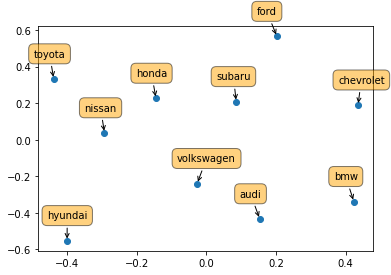

In [ ]:
## Calculating the dissimilarity matrix which is the input for plotting MDS plot
dissimilarity_matrix = 1/lift_brands
np.fill_diagonal(dissimilarity_matrix.values, 0)

## Plotting MDS plot
from sklearn import manifold
seed = np.random.RandomState(seed=3)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, 
      random_state=seed, dissimilarity="precomputed", n_jobs=1)
results = mds.fit(dissimilarity_matrix)
coords = results.embedding_

plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o'
    )
for label, x, y in zip(lift_brands, coords[:, 0], coords[:, 1]):
    
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points',ha = 'left', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'orange', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

### Insights
write brand manager stuff here


##Lift Analysis of Attributes and Brands
We found the most frequently mentioned attributes of cars in the discussions. The same attribute may be described by different words – e.g., pick-up and acceleration may both refer to a more general attribute, “performance”, for which we made suitable replacements.

We picked the 5 most frequently mentioned brands and found the most strongly associated atrributes with each of these 5 brands.



###Steps followed to obtain the list of attributes:
Found the list of nouns & adjectives which define the attributes
Manually went through a few comments and the list to decide on the final list of attributes (245 attributes)
Obtained the lift values and frequency for these attributes
Based on the lift values and frequencies, grouped the attributes into 22 groups
Found top 5 attributes based on the frequency
Calculated the lift values for these attributes with the top brands

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer # to remove punctuations
import re
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Obtain POS for the tokens
import nltk
nltk.download('averaged_perceptron_tagger')
posts['pos']=posts['comments_unique'].apply(nltk.tag.pos_tag)
posts[:5]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,ID,Date,user_id,comments,comments_tokens,comments_unique,pos
0,0,"June 29, 2000 9:33PM",bdreggors,One of my current favorites is the Lexus IS co...,"[one, current, favorites, lexus, commercial, g...","[blackmails, boss, cheesy, commercial, current...","[(blackmails, NNS), (boss, VBP), (cheesy, JJ),..."
1,1,"June 30, 2000 2:14AM",markz2k,What's the deal with the Dog family in the Ody...,"[deal, dog, family, odysey, commercials, never...","[00, ago, always, annoying, anybody, anyway, a...","[(00, CD), (ago, RB), (always, RB), (annoying,..."
2,2,"June 30, 2000 1:57PM",roadroach,The whole point of commercials is to get your ...,"[whole, point, commercials, get, attention, re...","[1, 2, also, attention, came, commercial, comm...","[(1, CD), (2, CD), (also, RB), (attention, NN)..."
3,3,"June 30, 2000 3:04PM",markz2k,"Yeah, I agree the point is to get your attenti...","[yeah, agree, point, get, attention, easily, b...","[agree, attention, away, backfire, bell, best,...","[(agree, JJ), (attention, NN), (away, RB), (ba..."
4,4,"June 30, 2000 3:25PM",bdreggors,I've noticed two fallicies in Hodna commercial...,"[noticed, two, fallicies, hodna, commercials, ...","[1, 2, analog, analyze, clack, clikity, close,...","[(1, CD), (2, CD), (analog, NN), (analyze, JJ)..."


In [ ]:
# Extract the list of adjectives
posts['adjectives']=posts['pos'].apply(lambda pos_list: [x[0] for x in pos_list if x[1].endswith('JJ')])
posts[:5]

,ID,Date,user_id,comments,comments_tokens,comments_unique,pos,adjectives
0,0,"June 29, 2000 9:33PM",bdreggors,One of my current favorites is the Lexus IS co...,"[one, current, favorites, lexus, commercial, g...","[blackmails, boss, cheesy, commercial, current...","[(blackmails, NNS), (boss, VBP), (cheesy, JJ),...","[cheesy, commercial, current, favorite, funny,..."
1,1,"June 30, 2000 2:14AM",markz2k,What's the deal with the Dog family in the Ody...,"[deal, dog, family, odysey, commercials, never...","[00, ago, always, annoying, anybody, anyway, a...","[(00, CD), (ago, RB), (always, RB), (annoying,...","[avoid, commercial, dog, good, odysey, stupid]"
2,2,"June 30, 2000 1:57PM",roadroach,The whole point of commercials is to get your ...,"[whole, point, commercials, get, attention, re...","[1, 2, also, attention, came, commercial, comm...","[(1, CD), (2, CD), (also, RB), (attention, NN)...","[commercial, different, lotus, new, relevant, ..."
3,3,"June 30, 2000 3:04PM",markz2k,"Yeah, I agree the point is to get your attenti...","[yeah, agree, point, get, attention, easily, b...","[agree, attention, away, backfire, bell, best,...","[(agree, JJ), (attention, NN), (away, RB), (ba...","[agree, commercial, honda, relevant, taco]"
4,4,"June 30, 2000 3:25PM",bdreggors,I've noticed two fallicies in Hodna commercial...,"[noticed, two, fallicies, hodna, commercials, ...","[1, 2, analog, analyze, clack, clikity, close,...","[(1, CD), (2, CD), (analog, NN), (analyze, JJ)...","[analyze, close, commercial, digital, eyes, mu..."


In [ ]:
# Filter the adjectives list only to make the list of attributes 
adj_lst = posts['adjectives'].apply(pd.Series).stack().unique()

# Get the frequencies for the nouns
adj_df= pd.DataFrame(adj_lst)
adj_df.columns=['adjectives']

# Join with frequency table and get frequency of all words
all_words = posts['comments_unique'].sum()
freq_dist = nltk.FreqDist(all_words)

df_fdist=pd.DataFrame(list(freq_dist.items()), columns=['term', 'freq'])

adj_freq_df = pd.merge(adj_df, df_fdist, right_on='term', left_on='adjectives')
adj_freq_df.sort_values(by=['freq'],ascending=False)[:50]

,adjectives,term,freq
114,like,like,963
521,think,think,625
14,new,new,576
17,toyota,toyota,571
1,commercial,commercial,561
987,even,even,476
4014,get,get,475
789,see,see,462
9,good,good,407
885,http,http,396


# Attribute Analysis
We made up common features of vehicles consumers care about most. 

In [ ]:
attribute_list = ['performance','luxury','reliable','safety','affordable','favorite','buy','speed','comfort',
                 'warranty','price','msrp','security','fuel','consumption','insurance','maintainence', 'dependable']
attr_df = pd.DataFrame(index = attribute_list)
attr_df['synonym'] = attribute_list
attr_df[:5]

,synonym
performance,performance
luxury,luxury
reliable,reliable
safety,safety
affordable,affordable


In [ ]:

attr_dict = attr_df["synonym"].to_dict()
posts["attr_tokens"] = posts["comments_unique"].apply(lambda list_of_words: [attr_dict[x] for x in list_of_words if x in attr_dict  ])

In [ ]:
# Define top 5 brands by frequency obtained previously
import numpy as np
top_brands=['toyota','ford','chevrolet','honda','hyundai']

# Get unique list of grouped attribute names
uniq_attr=np.unique(attr_df['synonym'])
uniq_attr

array(['affordable', 'buy', 'comfort', 'consumption', 'dependable',
       'favorite', 'fuel', 'insurance', 'luxury', 'maintainence', 'msrp',
       'performance', 'price', 'reliable', 'safety', 'security', 'speed',
       'warranty'], dtype=object)

In [ ]:
# Find top 5 attributes:

def calc_freq(tokenized_posts,find_list):
    freq_a=0
    for i in tokenized_posts:
        if find_list in i:
            freq_a += 1
    return freq_a
  
# Calculate freq for attr
df_top_attr=pd.DataFrame(columns=['attribute','freq'])
for i,attr in enumerate(uniq_attr):
        temp_freq=calc_freq( posts.comments_unique,str(attr))
        df_top_attr.loc[i]=[str(attr),temp_freq]

In [ ]:
top_attr=df_top_attr.sort_values(by='freq',ascending=False).head(5)
top_attr['attribute']

1             buy
12          price
8          luxury
16          speed
11    performance
Name: attribute, dtype: object

In [ ]:
# Grouped Brands and attribute lifts 
df_lift_brand_attr=pd.DataFrame(columns=['brand','attribute','lift'])
i=0
for  brand_a in top_brands:
    for attr in top_attr['attribute']:
        temp_lift=calculate_lift(str(brand_a), str(attr), posts.comments_unique)
        df_lift_brand_attr.loc[i]=[ str(brand_a),str(attr),temp_lift]
        i=i+1

In [ ]:
df1 = df_lift_brand_attr.sort_values('lift',ascending = False).groupby('brand').head(10)
print(df1.sort_values(['brand','lift'],ascending=[True,False]))

        brand    attribute      lift
14  chevrolet  performance  1.401468
13  chevrolet        speed  1.343074
11  chevrolet        price  1.051101
10  chevrolet          buy  1.011822
12  chevrolet       luxury  0.755479
8        ford        speed  1.668011
6        ford        price  1.392426
9        ford  performance  1.392426
7        ford       luxury  1.251008
5        ford          buy  0.933488
15      honda          buy  1.765455
19      honda  performance  1.116342
17      honda       luxury  1.069828
18      honda        speed  1.069828
16      honda        price  0.558171
21    hyundai        price  3.233350
22    hyundai       luxury  2.904963
20    hyundai          buy  1.667422
23    hyundai        speed  0.387328
24    hyundai  performance  0.000000
0      toyota          buy  1.520391
4      toyota  performance  1.322927
3      toyota        speed  1.267805
2      toyota       luxury  1.222526
1      toyota        price  1.133937


###Lift Matrix of the brands and the top-5 attributes

In [ ]:
lift_matrix = df1.pivot(index='brand', columns='attribute')
lift_matrix

lift                                          
attribute       buy    luxury performance     price     speed
brand                                                        
chevrolet  1.011822  0.755479    1.401468  1.051101  1.343074
ford       0.933488  1.251008    1.392426  1.392426  1.668011
honda      1.765455  1.069828    1.116342  0.558171  1.069828
hyundai    1.667422  2.904963    0.000000  3.233350  0.387328
toyota     1.520391  1.222526    1.322927  1.133937  1.267805

#Aspiration Analysis
We created a list of words and phrases people use to express desire to want to buy a vehice whether it be an actual purchase or somehting they wish they could buy if they had sufficient purchase capability.

In [ ]:
aspiration_list = ['wish to', 'hope to', 'want to', 'really want', 'prefer', 'dream car', 'dream of', 'aspire', 'looking for', 'looking to', 'would like', 'can afford', 'looking at']

In [ ]:
aspiration = pd.DataFrame(aspiration_list)
aspiration.columns=['word']
aspiration

,word
0,wish to
1,hope to
2,want to
3,really want
4,prefer
5,dream car
6,dream of
7,aspire
8,looking for
9,looking to


In [ ]:
## Function to replace the aspirational phrases with the word - "aspiration"
def asp_word_replace(comment):
    for i in aspiration['word'].index.values:
        comment = comment.lower().replace(aspiration['word'][i],'aspiration')
    return comment

In [ ]:
posts["comments_replace"] = posts["comments"].apply(asp_word_replace)

In [ ]:
## Tokenize the comments and remove stop words after replacing the phrases by aspiration
posts["comments_replace_tokens"] = posts["comments_replace"].apply(lambda each_post: word_tokenize(re.sub(r'[^\w\s]',' ',each_post.lower())))
posts["comments_replace_tokens"] = posts["comments_replace_tokens"].apply(lambda list_of_words: [x if x not in model_brand_dict else model_brand_dict[x] for x in list_of_words])
posts["comments_replace_tokens"] = posts["comments_replace_tokens"].apply(lambda list_of_words: [x for x in list_of_words if x not in stop])
posts["comments_replace_tokens"] = posts["comments_replace_tokens"].apply(lambda x: sorted(set(x)))

In [ ]:
## Get the lift score for all brands and aspirational words
lift_asp_brands = pd.DataFrame(columns=['Brand','Lift'])
for index, brand_a in all_brands.iterrows():
        lift_asp_brands = lift_asp_brands.append({'Brand': brand_a.brand, "Lift":calculate_lift(brand_a.brand, 'aspiration', posts.comments_replace_tokens)},
                                        ignore_index=True)

In [ ]:
lift_asp_brands.sort_values(by='Lift',ascending=False).head(5)

,Brand,Lift
28,volkwagen,5.328086
15,dodge,3.802791
22,pontiac,3.184603
20,volvo,2.886047
27,kia.,2.716279


#**Summary and Insights**

#Top 10 Brands

In [ ]:
lift_brands

,toyota,ford,chevrolet,honda,hyundai,subaru,bmw,audi,nissan,volkswagen
toyota,1.000000,1.458268,1.185480,2.488145,1.204720,1.832105,1.043222,1.197311,2.230574,1.190893
ford,1.458268,1.000000,2.963427,2.650412,0.839628,2.117409,1.209864,0.767085,1.369525,1.316129
chevrolet,1.185480,2.963427,1.000000,2.056292,0.784717,1.331974,1.719134,1.930166,1.908578,1.766234
honda,2.488145,2.650412,2.056292,1.000000,1.538628,2.829296,0.912920,1.639975,2.927949,2.462069
hyundai,1.204720,0.839628,0.784717,1.538628,1.000000,0.921905,1.239451,2.003902,1.467771,2.292135
subaru,1.832105,2.117409,1.331974,2.829296,0.921905,1.000000,1.914490,1.596773,1.754350,2.247934
bmw,1.043222,1.209864,1.719134,0.912920,1.239451,1.914490,1.000000,4.623819,1.451462,1.511111
audi,1.197311,0.767085,1.930166,1.639975,2.003902,1.596773,4.623819,1.000000,1.368894,3.461078
nissan,2.230574,1.369525,1.908578,2.927949,1.467771,1.754350,1.451462,1.368894,1.000000,1.789474
volkswagen,1.190893,1.316129,1.766234,2.462069,2.292135,2.247934,1.511111,3.461078,1.789474,1.000000


In [ ]:
top10

,brand,word_frequency
0,toyota,571
5,ford,310
3,chevrolet,308
1,honda,290
14,hyundai,267
12,subaru,242
4,bmw,225
21,audi,167
7,nissan,152
6,volkswagen,146


**Response to Tasks A & B**

The top 10 brands and their lift values are shown in the matrix above. 

When comparing the commercials for the top 10 most frequently mentioned brand, one of the brands that stood out the most was Hyundai. It is the brand that has had some of the lowest lift values when compared with other brand's commercials with 3 of its lift values less than 1. Those lift values show up when compared to ford, chevrolet, and subaru. It's even more notable since hyundai is the 5th most frequent brand suggesting that its commercials aren't causing consumers to compare them with other brands as much and may be looking at the commercial for entertainment or some other purpose that is not related to sales.
Another brand of note is Volkswagen. When looking at the lift values, it has 3 values greater than 2 and 1 value above 3(the highest lift value). At the same time, it is also the least frequent among the top 10 brands meaning it likely has the least amount of commercials compared to a brand like Toyota, the most frequent brand. This suggests that whenever volkswagen is brought up, its commercials allow it to be compared to many of the brands whether they are expensive luxury brands to cheap economic vehicles.

#Attributes and Brands


In [ ]:
lift_matrix

lift                                          
attribute       buy    luxury performance     price     speed
brand                                                        
chevrolet  1.011822  0.755479    1.401468  1.051101  1.343074
ford       0.933488  1.251008    1.392426  1.392426  1.668011
honda      1.765455  1.069828    1.116342  0.558171  1.069828
hyundai    1.667422  2.904963    0.000000  3.233350  0.387328
toyota     1.520391  1.222526    1.322927  1.133937  1.267805

**Response to Tasks C&D**

According to our analysis "buy", "luxury", "performance", "price", and "speed" seem to the top 5 most talked about attributes.  We can consider "buy" to be most important attribute as not only does it occurs much more often than any other attribute we can also assume that the customers are more likely to buy products from these brands and are more willing to recommend them on the internet. If a quality product has been manufactured then the managers can actually spend less money on advertising because the products speaks for itself and word of mouth would be an effective advetising campaign. 

Ford:

 Ford happens to be the only car brand with a lift value of 0.93 that is less than 1 when associated with the buy attribute. This is definitely something for Ford to assess as a lift value less than 1 essentially means "buy" is more likely to occur in a post without Ford in its' text than a post with Ford in its' text. Ford performed about average in the other attributes but found the 2nd highest lift values for price with 1.39 and the highest lift value for speed with 1.67. One interesting thing to note is that people are talking considerably about the price of ford relative to the other brands but are not neccessarily talking about buying the product at the same frequency. This could be an indication for the the product and advertising managers that the price of Ford cars are too high and changes should either be made in production to lower prices or margins should be lowered to in an attempt create more sales. Also, if the price is not something that is going to help the sales of ford cars it might be a good idea for the advertising manager to not put as much focus on pricing in the commercials.



Toyota:

Toyota has a relatively balanced lift matrix for the top-5 attributes. Therefore, their commercials must have a balance between luxury, performance, price and speed. They have an average "buy" lift value relative to the other brands. It's hard to advise on specifics given our brand attribute matrix with toyota.

Chevrolet:


Products have been in a mix of up and downs over the years. In 2019, the advertisement on Super Bowl ads helped increase the popularity for the brand but when other reports came out they tended to indicate that Chevrolet might not be as affordable and efficient as they say. 

Taking a look at our top 5 attributes lift values with chevrolet we can make some conclusions for the brand and product managers. Chevrolet has a low "buy" lift of 1.01 and shows some comparisions to Ford which also suffered a low "buy" lift. Both chevrolet and ford had the highest lift value in the performance attribute of approximately 1.4. However, it is clearly evident that performance or at least the way ford and chevrolet are marketing performance is not an effective way of creating sales or "buy" mentions in the posts. I would advise the marketing and product team to focus more on luxury in the commercials and in the production as they are clearly lagging behind some of the other brands.

Honda:

Honda is the most succesful in creating mentions of our most important "buy" attribute with a lift of 1.77. Although, their lift values for the other top attributes appear to be relatively low. Honda's "Price" attribute has a very low lift of 0.55 therefore, we can easily determine for Honda that price is not an important attribute to consider in commercials for honda to generate positive "buy" sentiment.

Hyundai:

Hyundia's values are very interesting with the highest luxury and price lift values among the 5 brands. The lift value for price can likely be interpreted as being very affordable. On the flip side, with luxury being one of the highest it can be interepreted as being perceived as having good luxury for its price point. Given that they have been rebranding themselves, this may reflect effective advertisements. "Performance" is also important as Hyundai and performance have zero association. Managers should determine whether they want their product and brand to be perceived as something that needs to be included or if already inlcuded then they need to make consumers aware of in their product for adverstising. The lift values also indicate 'Hyundai' was the least aspirational amongst the top 5 brands listed in our analysis. Hyundai is a brand that has usually prided itself in their high quality cars but in our analysis the lift value is relativley low, which is interesting to see when compared to the other brands in the top 5 lift values matrix. They need to look into quality, advertising and other issues to help increase their overall pull to their brand and attract customers that they are not currenlty able to do. 

Additionally, we can advise brand and product managers using the lift matrix of brands and top 5 attributes. Hynundai has the second highest lift value of 1.67 for the "buy" attribute this is a good indication that the commercials have been relatively successful. Also, their lift value for price attribute is a very signifciant 3.23, more than double any other brand's value for that attribute. It is reasonable to assume hyundai has good pricing as they are also have an overall positive sentiment with their high "buy" lift value. One area where hyundai seems to be lacking significantly is their performance attribute with a lift value of 0. It is clearly evident that performance currently is not something associated with hyundai commercials as well as the product as a whole. The marketing managers should work to empthasize any performance advantages that hyundai has over the brand in their commercials. If hyundai's do not have strong performance already it is on the product managers to try and create some of these performance advantages that the marketing team can highlight.

# Aspiration Analysis Explained

In [ ]:
lift_asp_brands.sort_values(by='Lift',ascending=False).head(5)

,Brand,Lift
28,volkwagen,5.328086
15,dodge,3.802791
22,pontiac,3.184603
20,volvo,2.886047
27,kia.,2.716279


**Response to Task E**

To determine the most aspirational car brand we created an aspiration list consisting of key words: 'wish to', 'hope to', 'want to', 'really want', 'prefer', 'dream car', 'dream of', 'aspire', 'looking for', 'looking to', 'would like', 'can afford', 'looking at'. This list was created where we took aspire to mean to actually buy and/or wish to own their dream car. What they actually buy and what they wish they could buy. We replaced any occurances of these words with aspiration as suggested in class. We then found the brand lift values associated with this aspirational word list. 

Volkswagen resulted as our most aspirational brand by a large margin with a lift value of 5.32. This suggests that relative to the buzz created by its commercials, Volkswagen's advertising has the most efficient effect of creating a desire to purchase their vehicles. 